In [230]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1. Exploratory Data Analysis (EDA) 

## 1.1. Load the data

In [84]:
# Set paths
main_path = os.path.dirname(os.getcwd())
data_path = os.path.join(main_path, "data")
data_name = "dataset_SCL.csv"
df = pd.read_csv(os.path.join(data_path, data_name))

C:\Users\diria\AppData\Local\Temp\ipykernel_29888\2397551344.py:5: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, data_name))


Conclusiones: 
- Se cargan los datos. 
- Existen problemas con la columna 1 y 6.

## 1.2. Check for missing values

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Conclusiones: 
- Existe solo un valor nulo.

Acciones: Ver que valor es el nulo

In [86]:
# create a boolean mask for missing values
mask = df.isna().any(axis=1)

# select the rows with missing values
rows_with_missing = df[mask]
rows_with_missing

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [87]:
df[df["Vlo-I"]  == "200"]["Vlo-O"].unique()

array(['200', nan], dtype=object)

Conclusion:
- Notamos que para ese vuelo en particular, el código Vlo-O es siempre 200. 
- También notamos que 200 esta como str y como float. Dado que es una categoria (ej:  Un vuelo con un codigo 200, no tiene una unidad menos de algo que un vuelo con codigo 201. Esos numeros solo representan vuelos distintos (distintas categorias)) deberia ser un str.
- Previamente notamos que las columnas 1 y 6 se cargaron con ciertos problemas, ahora sabemos que es porque se carga como float, y en otro como string. 

Accion:
- Se reemplaza el missing valur por 200.
- Se transforman los valores de Vlo-I y Vlo-O a str.

Observacion: 
- Se revisa que los valores que estan como float sean del tipo XX.O para asi no perder información al transformalos primero a int y luego a str.

In [88]:
# FIll na value with 200
df.fillna("200", inplace=True)

In [89]:
# Check if float values are not in type XX.0
for value in df["Vlo-I"].unique():
    if isinstance(value, float):
        if not int(value) == value:
            print(value)

In [90]:
# Check if float values are not in type XX.0
for value in df["Vlo-O"].unique():
    if isinstance(value, float):
        if not int(value) == value:
            print(value)

In [91]:
# Conver to int and then to str just the float values
def float_to_str(x):
    if type(x) == type(2.) and not np.isnan(x):
        return str(int(x))
    return x

df["Vlo-I"] = df["Vlo-I"].apply(lambda x: float_to_str(x))
df["Vlo-O"] = df["Vlo-O"].apply(lambda x: float_to_str(x))
df["Vlo-I"] = df["Vlo-I"].astype(str)
df["Vlo-O"] = df["Vlo-O"].astype(str)

## 1.3. Summarize the data

### 1.3.1. Shape

In [93]:
df.shape

(68206, 18)

Conclusiones: 
- Se tienen 68206 y 18 columnas

### 1.3.2. Column description

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68206 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Conclusiones:
- Las variables Fecha-I y Fecha-O denerían tener formato de datetime.
- El resto de las variables son categorias (ej:  Un vuelo con un codigo 200, no tiene una unidad menos de algo que un vuelo con codigo 201. Esos numeros solo representan vuelos distintos (distintas categorias). )
- Las variables que son numericas se pueden dejar de esa forma por ahora (para efectos de hacer visualizaciones) pero es importante saber que en verdad son cateogoricas.

Acciones:
- Se transforma las columnas Fecha-I y Fecha-O a datetime.
- Se crean vectores con los tipos de variables.
- Se crea la columna DIANOM_number.

In [95]:
# convert dates to datetime format
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

In [96]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [97]:
var_numeric = ['DIA', 'MES', 'AÑO']

In [98]:
var_categorical = ['Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES']

Estas columnas represetan la siguiente información:

Section 1: Scheduled information of the flight
| Field | Description |
| --- | --- |
| Fecha-I | Scheduled date and time of the flight. |
| Vlo-I | Scheduled flight number. |
| Ori-I | Programmed origin city code. |
| Des-I | Programmed destination city code. |
| Emp-I | Scheduled flight airline code. |


Section 2: Real operated information of the flight
| Field | Description |
| --- | --- |
| Fecha-O | Date and time of flight operation. |
| Vlo-O | Flight operation number of the flight. |
| Ori-O | Operation origin city code. |
| Des-O | Operation destination city code. |
| Emp-O | Airline code of the operated flight. |

Section 3: Dates of flight operation
| Field | Description |
| --- | --- |
| DIA | Day of the month of flight operation. |
| MES | Number of the month of operation of the flight. |
| AÑO | Year of flight operation. |
| DIANOM | Day of the week of flight operation. |

Section 4: Type of the flight
| Field | Description |
| --- | --- |
| TIPOVUELO | Type of flight, I =International, N =National. |

Section 5: Name of codes used in previous sections
| Field | Description |
| --- | --- |
| OPERA | Name of the airline that operates. |
| SIGLAORI | Name city of origin. |
| SIGLADES | Destination city name. |

Conclusiones: 

- Las variables de la seccion 1 pueden ayudar a entender si existen rutas frecuentes, y si esas rutas tienen algun patron particular de retraso (variables necesarias: Vlo-I, Ori-I, Des-I). Además, pueden ayudar a ver si alguna areolinea tiene un comportamiento particular  de retraso (Emp-I).

    - Preguntas hasta ahora:
        - Para este análisis es mejor considerar lo -I o lo -O?
        - Cuanto difiere lo -I de lo -O?

- Las variables de la seccion 2 pueden ayudar a entender: que pasa cuando lo planeado -I difiere de lo ejecutado -O. 
    - Preguntas hasta ahora:
        - Para este análisis es mejor considerar lo -I o lo -O? 
         - Cuanto difiere lo -I de lo -O?


- Las variables de la seccion 3 pueden servir para analizar si ciertos patrones estacionarios, por ejemplo estaciones del año, dias de la semana (fin de semana) u otros, afectan a que un vuelo se retrase.
- La variable de la seccion 4 puede ayudar a entender si los vuelos nacionales o internaiconales tienen patrones distintos de atraso de vuelos.
- Como las variables de seccion 5 son solo el nombre de otros códigos, me interesa guardarlas como diccionarios, dado que probablemente no serán consideradas en el análisis de calculo de probabilidad. 
    - Observacion: revisé que esa sección corresponde con como operó el vuelo. No con lo scheduled.


Otras consideraciones: 
- Es interesante estudiar tambien la mezcla de algunar variables, por ejemplo: aerolinea y ruta, ruta y temporada, aerolinea y temporada, entra otras. 
- Es interesante estudiar la frecuencia de retuas y retrasos y otras características/retrasos.
Otras variables: Podría el tiempo en santiago influir de manera significante en que un vuelo se retrase?

Acciones:
- Dado que es raro que uno este pronto a tomar un avion y cambien el origen o el destino, se revisan de inmediato esas cosas:

In [99]:
sum(df["Des-I"] == df["Des-O"])/len(df)

0.9995894789314723

Notamos que en el 99% de los casos no hay cambio de planes. Se decide trabar con Des-O.

### 1.3.4. Preview of the data

In [100]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 1.4 Visualize the data

### 1.4.1 Numeric variables distributions

In [101]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


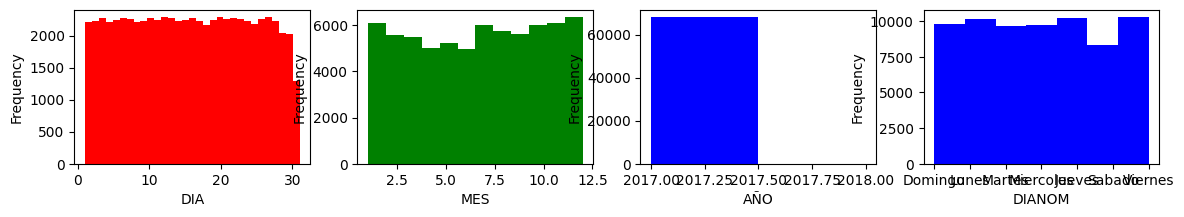

In [102]:
fig, ax = plt.subplots(1, 4, figsize=(14, 2))

ax[0].hist(df['DIA'], bins=31, color='red')
ax[0].set_xlabel('DIA')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['MES'], bins=12, color='green')
ax[1].set_xlabel('MES')
ax[1].set_ylabel('Frequency')

ax[2].hist(df['AÑO'], bins=2, color='blue')
ax[2].set_xlabel('AÑO')
ax[2].set_ylabel('Frequency')

ax[3].hist(df['DIANOM'], bins=7, color='blue')
ax[3].set_xlabel('DIANOM')
ax[3].set_ylabel('Frequency')

plt.show()

Conclusiones:
- A primera vista no se ve nada raro con estas variables. Los días, meses, años y dianom estan en un rango adecuado. No se ven los datos centrados en algun valor en particular.
- Los datos son mayormente del 2017, a excepcion de dos vuelos que pasaron justo de la media noche del ultimo dia del 2017. (por retrasos)

### 1.4.2 Categoric variables distributions

In [103]:
def distribution_cat_variables(variable):
    # Group the data by airline and count the number of flights for each airline
    airline_counts = df[variable].value_counts()

    # Normalize the values to show proportions
    airline_proportions = airline_counts / airline_counts.sum()

    # Create a bar graph of airline market share
    plt.figure(figsize=(10, 2))
    airline_proportions.plot(kind='bar',cmap='viridis')
    plt.title(f'Number of flights by {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Proportion of Flights')
    plt.show()

In [104]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

#### Vlo-I, Vlo-O

In [105]:
# distribution_cat_variables('Vlo-I'), distribution_cat_variables('Vlo-O')

Conclusiones:
- Hay un monton de numeros de vuelos.
- Esta informacion no se necesita para describir un vuelo. Hay otra informacion mas útil como destino, fecha de partida, operario, entre otros.
- Por ende, se eliminan estas columnas.

Acciones:
- Eliminar esas columnas

In [106]:
df.drop(["Vlo-I", "Vlo-O"], axis = 1, inplace=True)

#### Ori-I, Ori-O

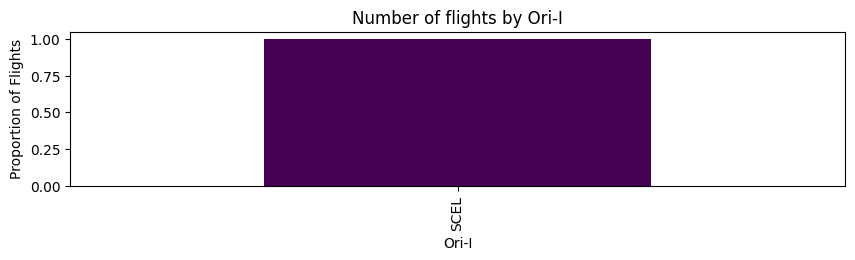

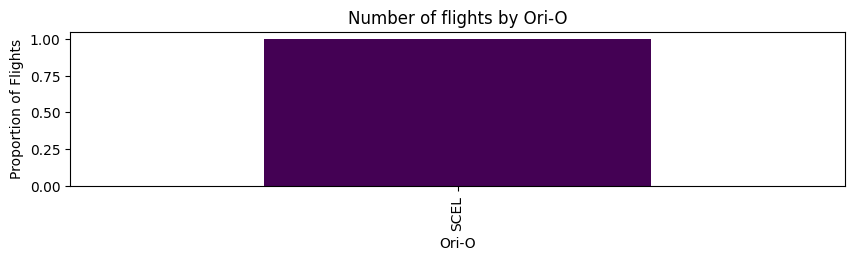

(None, None)

In [107]:
distribution_cat_variables('Ori-I'), distribution_cat_variables('Ori-O')

Conclusiones:
- Estas variables no aportan nada de informacion, por lo que se eliminan

Acciones:
- Eliminar las variables

In [108]:
df.drop(["Ori-I", "Ori-O"], axis = 1, inplace=True)

### Dest-I, Des-O

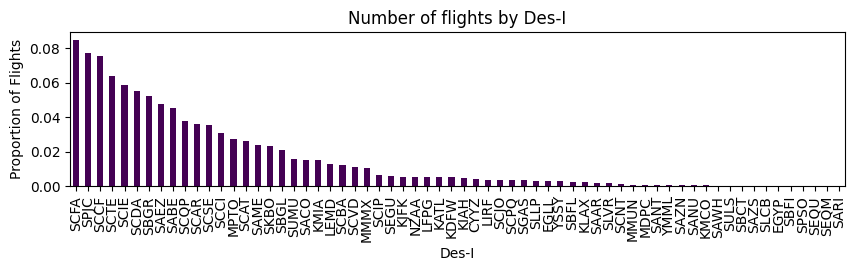

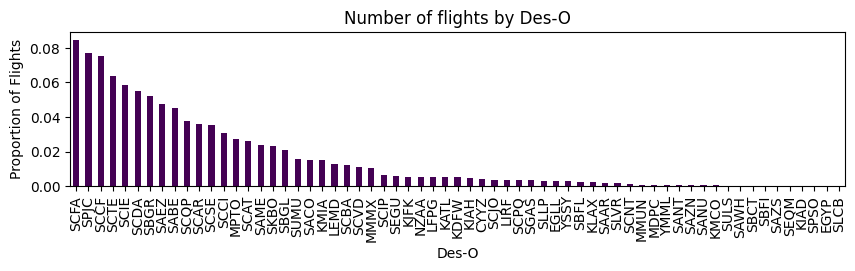

(None, None)

In [109]:
distribution_cat_variables('Des-I'), distribution_cat_variables('Des-O')

#### Emp-I, Emp-O

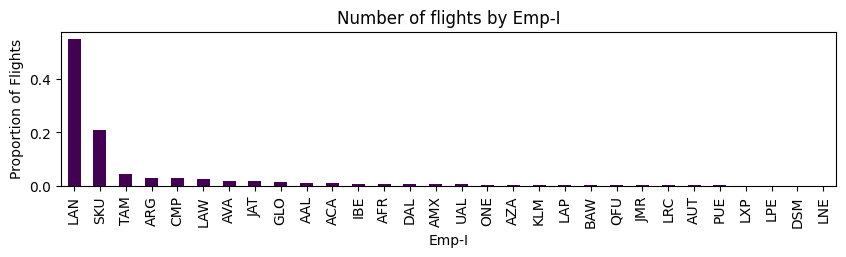

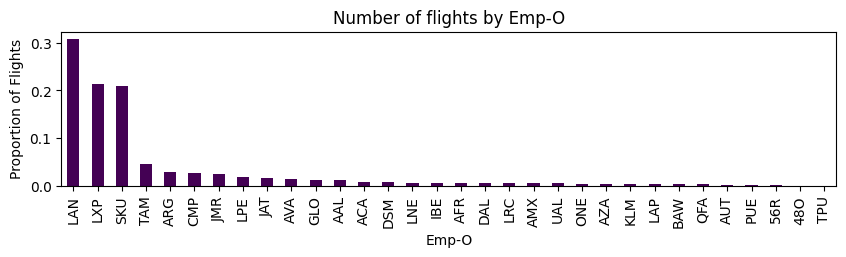

In [110]:
distribution_cat_variables('Emp-I')
distribution_cat_variables('Emp-O')

In [111]:
df[df["Emp-O"] == "LPE"].head(1)

,Fecha-I,Des-I,Emp-I,Fecha-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
5876,2017-01-02 16:20:00,SPJC,LAN,2017-01-02 17:23:00,SPJC,LPE,2,1,2017,Lunes,I,Grupo LATAM,Santiago,Lima


In [112]:
df[df["Emp-O"] == "LXP"].head(1)

,Fecha-I,Des-I,Emp-I,Fecha-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
3334,2017-01-02 06:40:00,SCIE,LAN,2017-01-02 06:41:00,SCIE,LXP,2,1,2017,Lunes,N,Grupo LATAM,Santiago,Concepcion


In [113]:
df[df["Emp-O"] == "LAN"].head(1)

,Fecha-I,Des-I,Emp-I,Fecha-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
2526,2017-01-02 11:05:00,SCNT,LAN,2017-01-02 11:03:00,SCNT,LAN,2,1,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Natales


Conclusiones:
- Notamos que entre lo -I (scheduled) y lo -O hay una diferencia.
- Al mirar de cerca lo -O notamos que distintos acronimos de -O en verdad son el mismo grupo que opera que es GRUPO LATAM.
- Lo mismo sucede en lo -I

Acciones:
- Mirar si esto pasa en todos los operadores.
- Si bien el grupo de la aerolinea puede cambiar, cambia el grupo que opera?

In [114]:
for i in df["OPERA"].unique():
    print(i, df[df["OPERA"] == i]["Emp-I"].unique(), df[df["OPERA"] == i]["Emp-O"].unique())

American Airlines ['AAL'] ['AAL']
Air Canada ['ACA'] ['ACA']
Air France ['AFR'] ['AFR']
Aeromexico ['AMX'] ['AMX']
Aerolineas Argentinas ['ARG'] ['ARG' 'AUT']
Austral ['AUT'] ['AUT' 'ARG']
Avianca ['AVA'] ['AVA' 'LRC' 'TPU']
Alitalia ['AZA'] ['AZA']
British Airways ['BAW'] ['BAW']
Copa Air ['CMP'] ['CMP']
Delta Air ['DAL'] ['DAL']
Gol Trans ['GLO'] ['GLO']
Iberia ['IBE'] ['IBE']
K.L.M. ['KLM'] ['KLM']
Qantas Airways ['QFU'] ['QFA']
United Airlines ['UAL'] ['UAL']
Grupo LATAM ['LAP' 'TAM' 'LAN' 'LXP' 'LNE' 'LPE' 'DSM'] ['LAP' 'TAM' 'LAN' 'LXP' 'LNE' 'LPE' 'DSM']
Sky Airline ['SKU'] ['SKU']
Latin American Wings ['LAW' 'JMR'] ['48O' '56R' 'JMR']
Plus Ultra Lineas Aereas ['PUE'] ['PUE']
JetSmart SPA ['JAT'] ['JAT']
Oceanair Linhas Aereas ['ONE'] ['ONE']
Lacsa ['LRC'] ['LRC']


In [115]:
df[df["OPERA"] == "Grupo LATAM"]["Emp-I"].unique()

array(['LAP', 'TAM', 'LAN', 'LXP', 'LNE', 'LPE', 'DSM'], dtype=object)

In [116]:
df[df["OPERA"] == "Grupo LATAM"]["Emp-O"].unique()

array(['LAP', 'TAM', 'LAN', 'LXP', 'LNE', 'LPE', 'DSM'], dtype=object)

Conclusiones:
- Hay una diferencia entre lo -I y lo -O.

#### TIPOVUELO

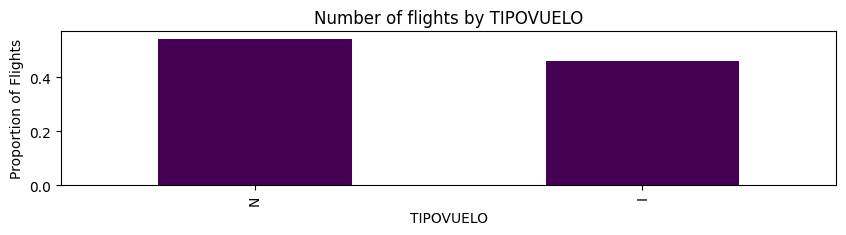

In [117]:
distribution_cat_variables('TIPOVUELO')

Conclusiones:
- Notamos que un existe una mayor cantidad de vuelos nacionales que internacionales, sin embargo, existe una gran cantidad de datos de ambos tipos de vuelos.

#### Opera

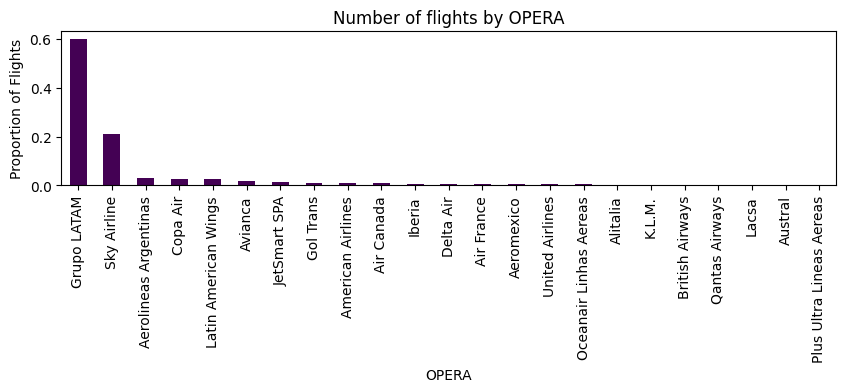

In [118]:
distribution_cat_variables('OPERA')

Conclusiones:
- Notamos que LATAM y SKY Airlines operan al menos un 80% de los vuelos.

### Conclusiones Generales

### 1.4.2. Time variables

Cantidad de vuelos por mes

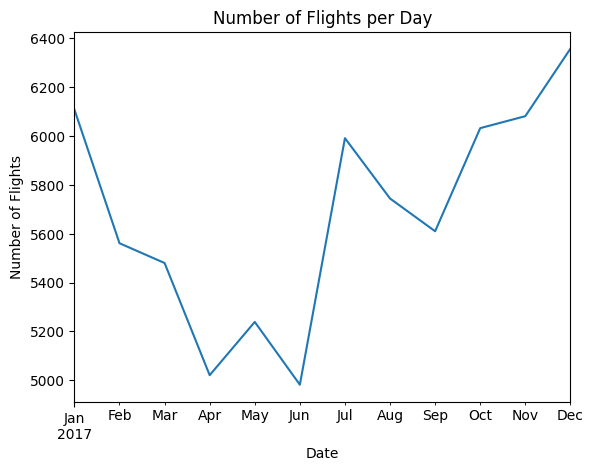

In [119]:
df.set_index('Fecha-I').resample('M').size().plot()
plt.title('Number of Flights per Day')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.show()

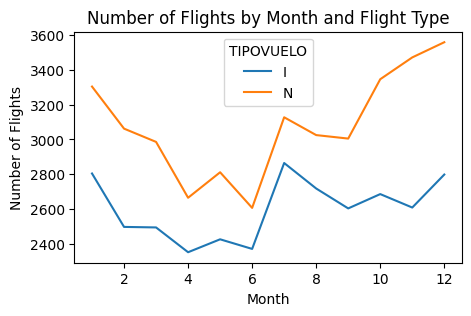

In [120]:
# Group the data by month and flight type and count the number of flights for each group
month_type_counts = df.groupby(['MES', 'TIPOVUELO']).size().unstack()

# Create a line chart of number of flights by month and flight type
ax = month_type_counts.plot(kind='line', figsize=(5, 3))
ax.set_title('Number of Flights by Month and Flight Type')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Flights')
plt.show()

Conclusiones:
- La estacionalidad de vuelos naciones e internacionales es la misma.

Cantidad de vuelos por día

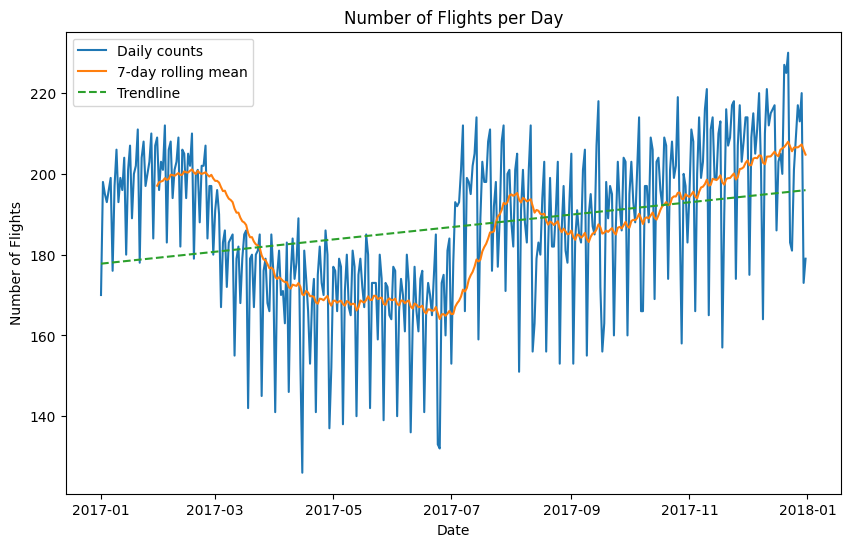

In [121]:
# Resample the data to daily frequency and calculate the rolling mean with a window size of 7 days
daily_counts = df.set_index('Fecha-I').resample('D').size()
rolling_mean = daily_counts.rolling(window=30).mean()

# Plot the daily flight counts and the rolling mean
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_counts.index, daily_counts.values, label='Daily counts')
ax.plot(rolling_mean.index, rolling_mean.values, label='7-day rolling mean')
ax.legend()

# Calculate and plot the trendline
x = np.arange(len(daily_counts))
coeffs = np.polyfit(x, daily_counts, 1)
trendline = np.poly1d(coeffs)
ax.plot(daily_counts.index, trendline(x), label='Trendline', linestyle='--')
ax.legend()

ax.set_title('Number of Flights per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Flights')
plt.show()

Conclusiones:
- Notamos que hay dos peak en la demanda de vuelos
- Un peak puede relacionarse con las vacaciones de invierno en Chile (finales de Julio - principios de Agosto)
- El otro peak puede relacionarse con las vacaciones de verano en Chile (finales de Noviembre - principios de Marzo)

### 1.4.3. Mix Visualization

TIPOVUELO

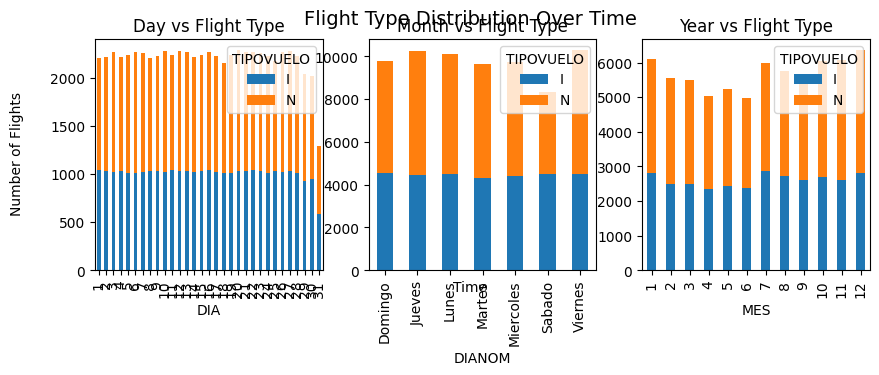

In [122]:
# Create a figure with 1 row and 3 columns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Plot the first bar chart on the first subplot
df.groupby(['DIA', 'TIPOVUELO']).size().unstack().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Day vs Flight Type')

# Plot the second bar chart on the second subplot
df.groupby(['DIANOM', 'TIPOVUELO']).size().unstack().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Month vs Flight Type')

# Plot the third bar chart on the third subplot
df.groupby(['MES', 'TIPOVUELO']).size().unstack().plot(kind='bar', stacked=True, ax=ax[2])
ax[2].set_title('Year vs Flight Type')

# Set common labels and title for the subplots
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.04, 0.5, 'Number of Flights', va='center', rotation='vertical')
fig.suptitle('Flight Type Distribution Over Time', fontsize=14)

# Show the plot
plt.show()

Destination

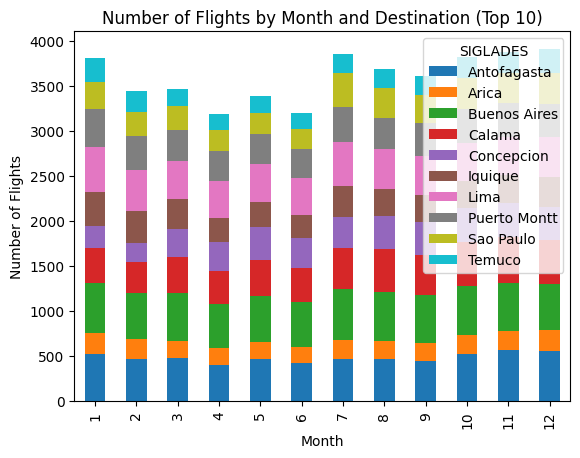

In [123]:
# Group the flights by destination, and count the number of flights to each destination
flights_by_destination = df.groupby('SIGLADES').size()

# Select the top 10 destinations by number of flights
top_destinations = flights_by_destination.nlargest(10)

# Filter the data to include only the top 10 destinations
df_top_destinations = df[df['SIGLADES'].isin(top_destinations.index)]

# Group the filtered data by month and destination, and count the number of flights in each group
flights_by_month_and_destination = df_top_destinations.groupby(['MES', 'SIGLADES']).size().unstack()

# Create a stacked bar chart showing the number of flights to each destination for each month
flights_by_month_and_destination.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Number of Flights by Month and Destination (Top 10)')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

# Show the chart
plt.show()

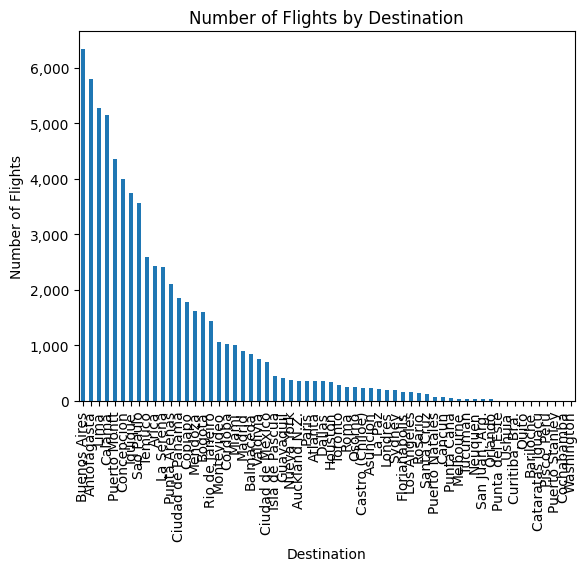

In [124]:
# Group the flights by destination, and count the number of flights to each destination
flights_by_destination = df.groupby('SIGLADES').size()

# Select the top 10 destinations by number of flights
top_destinations = flights_by_destination.nlargest(100)

# Filter the data to include only the top 10 destinations
df_top_destinations = df[df['SIGLADES'].isin(top_destinations.index)]

# Group the filtered data by destination, and count the number of flights to each destination
flights_by_destination = df_top_destinations.groupby('SIGLADES').size()

# Sort the destinations by the number of flights in descending order
flights_by_destination = flights_by_destination.sort_values(ascending=False)

# Create a bar chart showing the number of flights to each destination
ax = flights_by_destination.plot(kind='bar')

# Set the chart title and axis labels
ax.set_title('Number of Flights by Destination')
ax.set_xlabel('Destination')
ax.set_ylabel('Number of Flights')

# Format the Y-axis labels as integers with thousand separators
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Show the chart
plt.show()

# 2. Generate additional columns

## 2.1 Mandatory columns

### 2.1.1. high_season
1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.

In [125]:
df["high_season"] = (
      ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | 
      (df['Fecha-I'].dt.month == 1) | 
      (df['Fecha-I'].dt.month == 2) | 
      ((df['Fecha-I'].dt.month == 3) & (df['Fecha-I'].dt.day <= 3)) | 
      ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | 
      ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))
   ).astype(int)

### 2.1.2. min_diff
difference in minutes between Date-O and Date-I .

In [126]:
df['min_diff'] = df.apply(lambda x: (x['Fecha-O'] - x['Fecha-I']).total_seconds() / 60, axis=1)

### 2.1.3. delay_15
1 if min_diff > 15, 0 if not.

In [127]:
df['delay_15'] = (df['min_diff'] > 15).astype(int)

### 2.1.4. period_day
morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based on Date-I .

In [128]:
# Create the period_day variable
df.loc[(df['Fecha-I'].dt.hour >= 5) & (df['Fecha-I'].dt.hour < 12), 'period_day'] = 'morning'
df.loc[(df['Fecha-I'].dt.hour >= 12) & (df['Fecha-I'].dt.hour < 19), 'period_day'] = 'afternoon'
df.loc[((df['Fecha-I'].dt.hour >= 19) & (df['Fecha-I'].dt.hour <= 23)) | ((df['Fecha-I'].dt.hour >= 0) & (df['Fecha-I'].dt.hour < 5)), 'period_day'] = 'night'

### 2.1.5. Guardar en .CSV

In [129]:
df[["high_season", "min_diff", "delay_15", "period_day"]].to_csv(os.path.join(data_path, "synthetic_features.csv"))

In [130]:
df.to_csv(os.path.join(data_path, "data_to_play.csv"))

## 2.2 Own variables

In [227]:
# Calculate the overall delay rate
delay_rate = df['delay_15'].mean()
print('Overall Delay Rate:', round(delay_rate * 100, 2), '%')

Overall Delay Rate: 18.49 %


In [132]:
# Create a new dataframe 'historical_delay_rate' to store the historical delay rate for each airline and destination
# historical_delay_rate_airline_destination_month = df.groupby(['Emp-O', 'Des-O', 'MES'])['delay_15'].mean().reset_index()
# historical_delay_rate_airline_destination_month.rename(columns={'Emp-O': 'Airline', 'Des-O': 'Destination', 'delay_15': 'Historical_delay_rate'}, inplace=True)
# historical_delay_rate_airline_destination_month

,Airline,Destination,MES,Historical_delay_rate
0,48O,SPJC,1,0.200000
1,56R,SPJC,1,0.647059
2,AAL,KDFW,1,0.129032
3,AAL,KDFW,2,0.076923
4,AAL,KDFW,3,0.000000
...,...,...,...,...
1220,UAL,KIAH,8,0.125000
1221,UAL,KIAH,9,0.076923
1222,UAL,KIAH,10,0.103448
1223,UAL,KIAH,11,0.038462


In [225]:
# Create a new dataframe 'historical_delay_rate' to store the historical delay rate for each airline and destination
# historical_delay_rate_airline_destination = df.groupby(['Emp-O', 'Des-O'])['delay_15'].mean().reset_index()
# historical_delay_rate_airline_destination.rename(columns={'Emp-O': 'Airline', 'Des-O': 'Destination', 'delay_15': 'Historical_delay_rate'}, inplace=True)
# historical_delay_rate_airline_destination

,Airline,Destination,Historical_delay_rate
0,48O,SPJC,0.200000
1,56R,SPJC,0.647059
2,AAL,KDFW,0.070028
3,AAL,KMIA,0.065163
4,AAL,SUMU,0.000000
...,...,...,...
146,TAM,SBGR,0.224699
147,TAM,SPJC,0.358025
148,TPU,SPJC,1.000000
149,UAL,KIAD,0.000000


## Q : What variables would you expect to have the most influence in predicting delays?

### 3.1.1.  Delay rate across destination

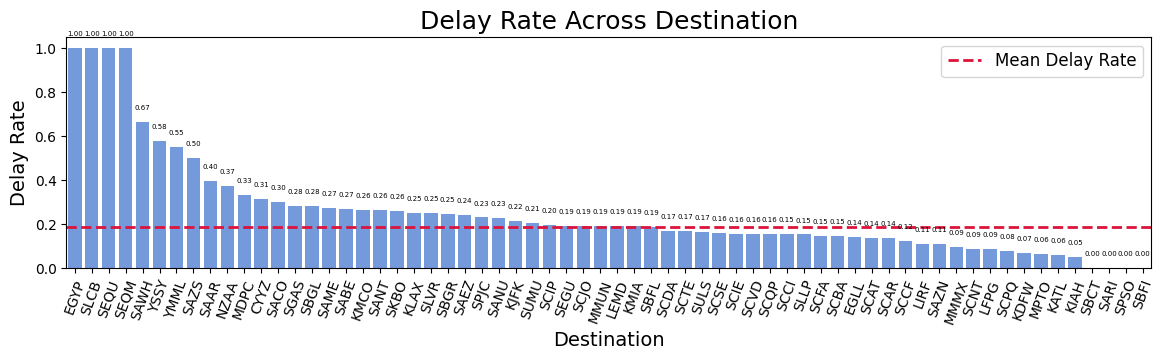

In [203]:
# Calculate delay rate by destination
delay_rate = df.groupby('Des-I')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 3))
sns.barplot(x=delay_rate.index, y=delay_rate.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Destination', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Destination', fontsize=18)
ax.tick_params(axis='x', labelrotation=70)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=5, padding=8)

plt.show()

### 3.1.1.  Delay rate across airline

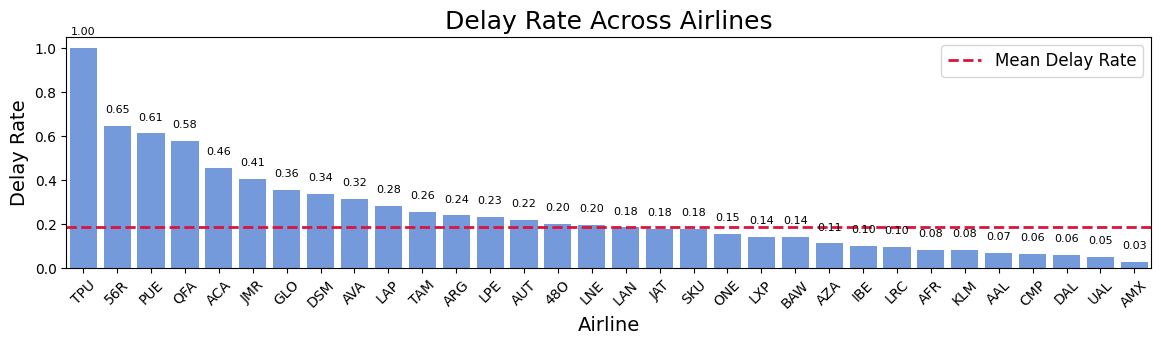

In [175]:
# Calculate delay rate by airline
airline_delay_rate = df.groupby('Emp-O')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 3))
sns.barplot(x=airline_delay_rate.index, y=airline_delay_rate.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Airline', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Airlines', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=8, padding=8)

plt.show()

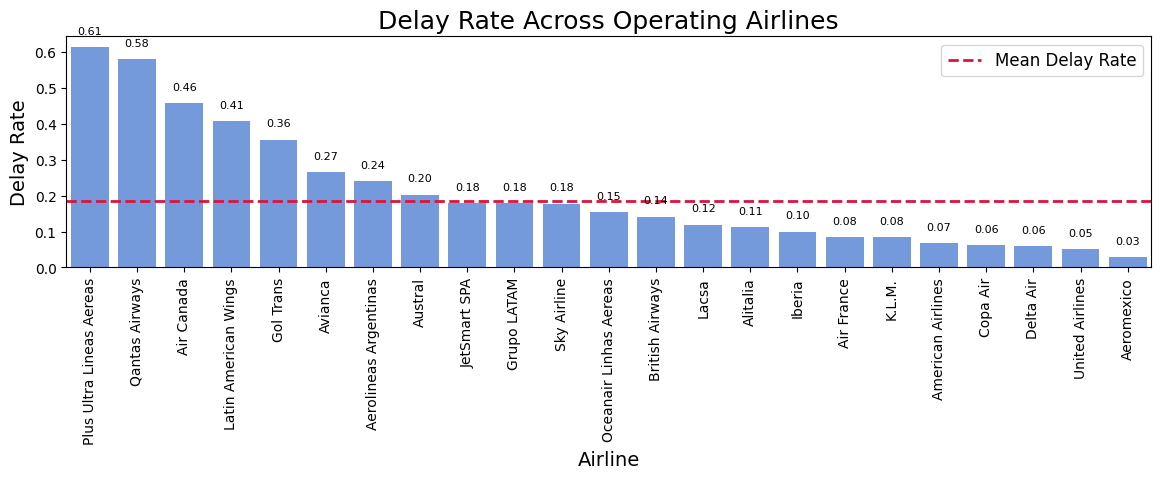

In [214]:
# Calculate delay rate by airline
airline_delay_rate = df.groupby('OPERA')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 3))
sns.barplot(x=airline_delay_rate.index, y=airline_delay_rate.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Airline', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Operating Airlines', fontsize=18)
ax.tick_params(axis='x', labelrotation=90)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=8, padding=8)

plt.show()

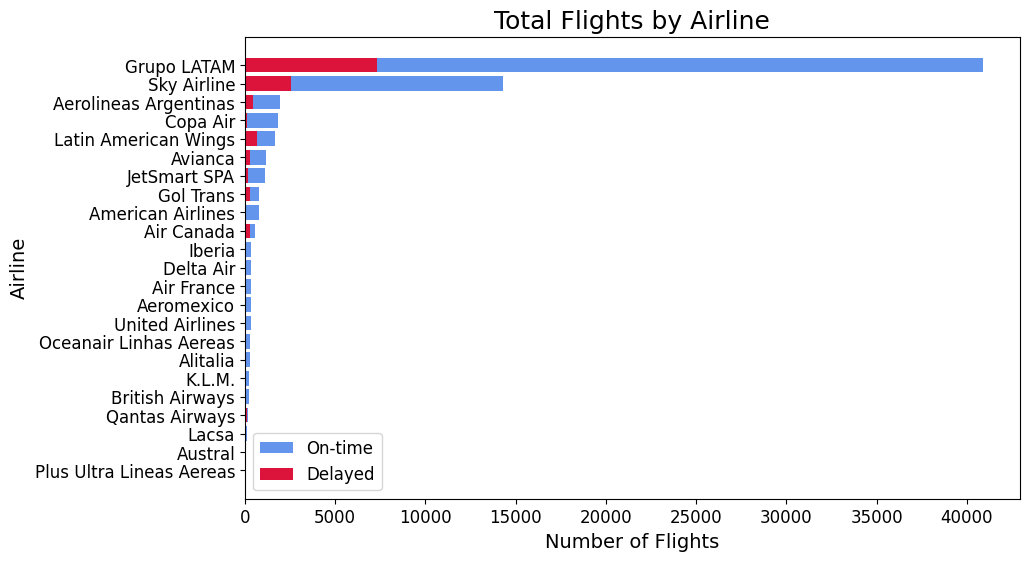

In [224]:
# Calculate total number of flights by airline
total_flights = df['OPERA'].value_counts().sort_values(ascending=False)

# Calculate delayed flights by airline
delayed_flights = df[df['delay_15'] == 1]['OPERA'].value_counts().sort_values(ascending=False)

# Calculate on-time flights by airline
ontime_flights = df[df['delay_15'] == 0]['OPERA'].value_counts().sort_values(ascending=False)

# Create a DataFrame with the above results
df_counts = pd.DataFrame({'Total Flights': total_flights, 'Delayed Flights': delayed_flights, 'On-time Flights': ontime_flights})

# Create a new column with the delay rate
df_counts['Delay Rate'] = df_counts['Delayed Flights'] / df_counts['Total Flights']

# Sort the DataFrame by the total number of flights
df_counts = df_counts.sort_values(by='Total Flights', ascending=True)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_counts.index, df_counts['Total Flights'], color='cornflowerblue')
ax.barh(df_counts.index, df_counts['Delayed Flights'], color='crimson')
ax.set_xlabel('Number of Flights', fontsize=14)
ax.set_ylabel('Airline', fontsize=14)
ax.set_title('Total Flights by Airline', fontsize=18)
ax.legend(['On-time', 'Delayed'], fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.show()

C:\Users\diria\AppData\Local\Temp\ipykernel_29888\1788388390.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(y="OPERA", x="min_diff", size=4, palette=colors,
C:\Users\diria\AppData\Local\Temp\ipykernel_29888\1788388390.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)])


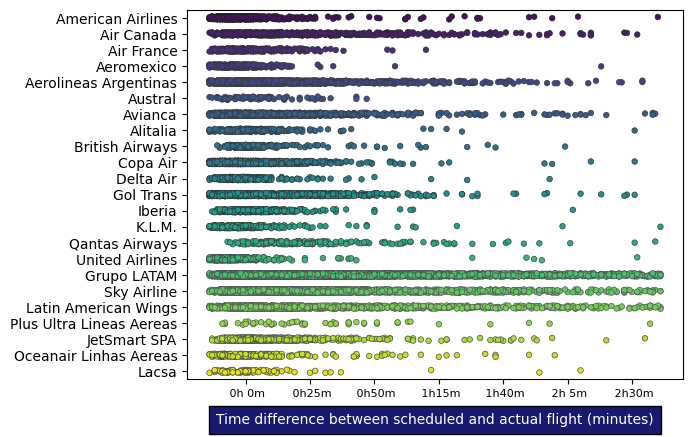

In [210]:
# set color palette
colors = "viridis"

# create stripplot
ax = sns.stripplot(y="OPERA", x="min_diff", size=4, palette=colors,
                   data=df, linewidth=0.5, jitter=True)

# set font sizes
plt.setp(ax.get_xticklabels(), fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=10)

# format x-axis labels
ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)])
                    for x in ax.get_xticks()])

# set x and y axis labels
plt.xlabel('Time difference between scheduled and actual flight (minutes)', fontsize=10, 
           bbox={'facecolor':'midnightblue', 'pad':5}, color='w', labelpad=10)

plt.ylabel('Airline', fontsize=18)

# remove y-axis label
ax.yaxis.label.set_visible(False)

### 3.1.1.  Delay rate across day of the week

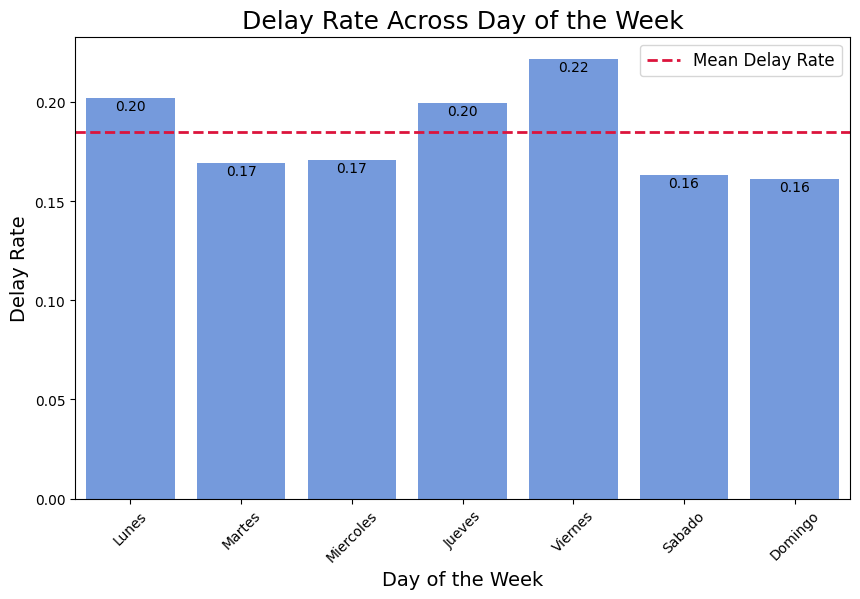

In [202]:
# Calculate delay rate by day of the week
delay_rate_dow = df.groupby('DIANOM')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(10, 6))
order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
sns.barplot(x=delay_rate_dow.index, y=delay_rate_dow.values, ax=ax, color='cornflowerblue', order = order)

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Day of the Week', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)

plt.show()


### 3.1.1.  Delay rate across month

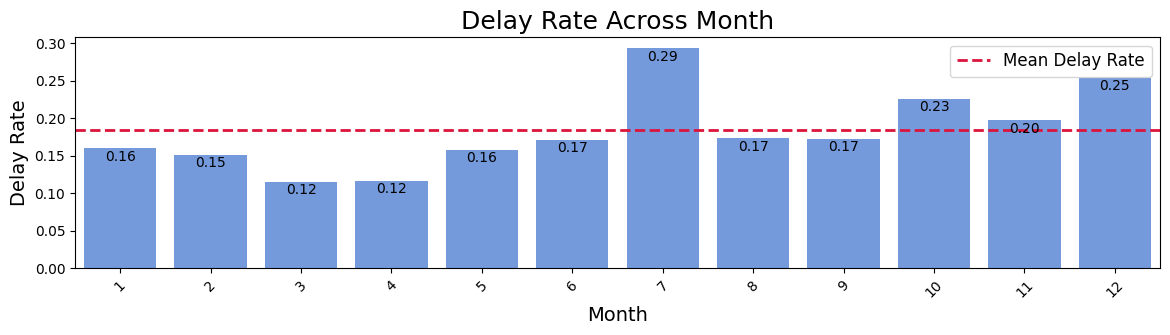

In [201]:
# Calculate delay rate by month
delay_rate_month = df.groupby('MES')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(14, 3))
sns.barplot(x=delay_rate_month.index, y=delay_rate_month.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Month', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)

plt.show()

### 3.1.1.  Delay rate across season

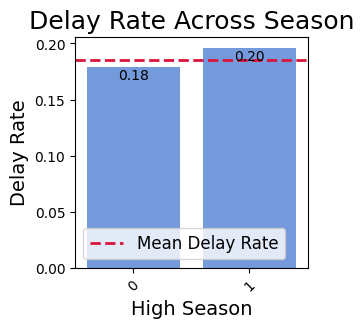

In [200]:
# Calculate delay rate by high_season
delay_rate_season = df.groupby('high_season')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=delay_rate_season.index, y=delay_rate_season.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('High Season', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Season', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)

plt.show()

### 3.1.1.  Delay rate across  type of flight

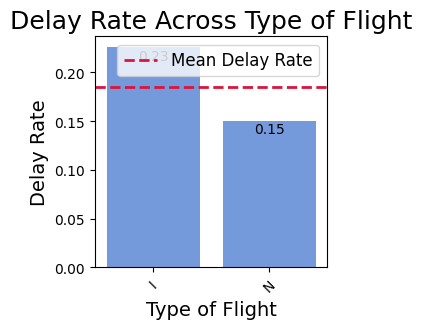

In [226]:
# Calculate delay rate by high_season
delay_rate_type_flight = df.groupby('TIPOVUELO')['delay_15'].mean().sort_values(ascending=False)

# Calculate mean delay rate
mean_delay_rate = df['delay_15'].mean()

# Create barplot
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=delay_rate_type_flight.index, y=delay_rate_type_flight.values, ax=ax, color='cornflowerblue')

# Add mean line
ax.axhline(mean_delay_rate, color='crimson', linestyle='--', linewidth=2, label='Mean Delay Rate')

# Set labels and titles
ax.set_xlabel('Type of Flight', fontsize=14)
ax.set_ylabel('Delay Rate', fontsize=14)
ax.set_title('Delay Rate Across Type of Flight', fontsize=18)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(fontsize=12)

# Add values on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=10, padding=-11)


plt.show()

## New variables

### delay rate destination

In [141]:
df['historical_delay_rate_dest'] = df.groupby('Des-O')['delay_15'].transform('mean')

### delay rate airline

In [142]:
df['historical_delay_rate_airline'] = df.groupby('Emp-O')['delay_15'].transform('mean')

### delay rate for day of the week

In [143]:
df['historical_delay_rate_dianom'] = df.groupby('DIANOM')['delay_15'].transform('mean')

### delay rate for month 

In [144]:
df['historical_delay_rate_month'] = df.groupby('MES')['delay_15'].transform('mean')

### delay rate for season 

In [145]:
df['historical_delay_rate_season'] = df.groupby('high_season')['delay_15'].transform('mean')

### delay rate for type of flight 

In [146]:
df['historical_delay_rate_type_flight'] = df.groupby('TIPOVUELO')['delay_15'].transform('mean')

### delay rate by airline and destination

In [147]:
delay_rate_by_airline_dest = df.groupby(['Emp-O', 'Des-O'])['delay_15'].mean().reset_index()
delay_rate_by_airline_dest.rename(columns={'delay_15': 'airline_dest_delay_rate'}, inplace=True)
df = pd.merge(df, delay_rate_by_airline_dest, on=['Emp-O', 'Des-O'], how='left')

### delay rate by airline and destination and month

In [148]:
delay_rate_by_airline_dest_month = df.groupby(['Emp-O', 'Des-O', 'MES'])['delay_15'].mean().reset_index()
delay_rate_by_airline_dest_month.rename(columns={'delay_15': 'airline_dest_delay_rate_month'}, inplace=True)
df = pd.merge(df, delay_rate_by_airline_dest_month, on=['Emp-O', 'Des-O', 'MES'], how='left')

# 4

In [149]:
df.columns

Index(['Fecha-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Des-O', 'Emp-O', 'DIA', 'MES',
       'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES',
       'high_season', 'min_diff', 'delay_15', 'period_day',
       'historical_delay_rate_dest', 'historical_delay_rate_airline',
       'historical_delay_rate_dianom', 'historical_delay_rate_month',
       'historical_delay_rate_season', 'historical_delay_rate_type_flight',
       'airline_dest_delay_rate', 'airline_dest_delay_rate_month'],
      dtype='object')

In [150]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(df[['historical_delay_rate_airline', 'historical_delay_rate_dest', 'high_season', 'DIANOM']],
                                                    df['delay_15'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define the column transformer
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['historical_delay_rate_airline', 'historical_delay_rate_dest']),
    ('cat', cat_transformer, ['high_season', 'DIANOM'])
])

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessor.transform(X_test)

c:\Users\diria\Desktop\PRoyectos\desafio_latam\.desafio_latam_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict on the testing data
y_pred = clf.predict(X_test_preprocessed)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.812051018912183
Precision: 0.5543478260869565
Recall: 0.019813519813519812
F1-score: 0.0382595648912228


# 5. Adventure to get some weather data

In [ ]:
# New libraries
import requests
from datetime import datetime

In [ ]:
# api_key = '7740466e856778d11838ea31e5e0463d'
# city = 'Santiago'
# country_code = 'CL'

# url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country_code}&appid={api_key}&units=imperial'

# def get_weather_data(row):
#     departure_time = row['Fecha-I']
#     departure_time_str = departure_time.strftime('%Y-%m-%d %H:%M:%S')
#     response = requests.get(url)
#     if response.status_code == 200:
#         weather_data = response.json()
#         row['temperature'] = weather_data['main']['temp']
#         row['humidity'] = weather_data['main']['humidity']
#         row['wind_speed'] = weather_data['wind']['speed']
#         row['weather_description'] = weather_data['weather'][0]['description']
#     else:
#         row['temperature'] = np.nan
#         row['humidity'] = np.nan
#         row['wind_speed'] = np.nan
#         row['weather_description'] = np.nan
#     return row

# df_2 = pd.DataFrame()
# df_2 = df.apply(get_weather_data, axis=1)